In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [10]:
# Charger les données d'entraînement et de test à partir des fichiers CSV
train_path = "../data/dataset/sign_mnist_train.csv"
test_path = "../data/dataset/sign_mnist_test.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)


In [11]:
# Séparer les labels et les images
y_train = train_data["label"].values
X_train = train_data.drop(columns=["label"]).values

y_test = test_data["label"].values
X_test = test_data.drop(columns=["label"]).values

In [12]:
# Reshape des images (28x28) et normalisation des valeurs
X_train = X_train.reshape(-1, 28, 28) / 255.0
X_test = X_test.reshape(-1, 28, 28) / 255.0


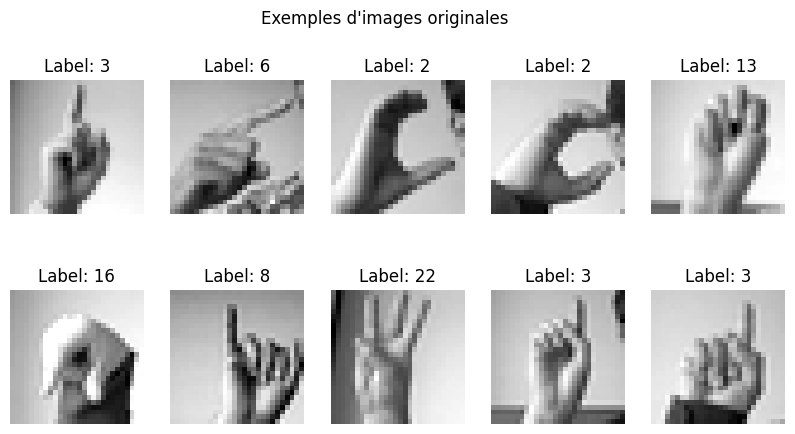

In [13]:
# Afficher quelques exemples d'images originales
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Exemples d'images originales")
plt.show()

In [14]:
# Extraction des caractéristiques HOG
def extract_hog_features(images, visualize=False):
    features = []
    hog_images = []
    for image in images:
        if visualize:
            hog_feature, hog_image = hog(
                image, 
                orientations=9, 
                pixels_per_cell=(8, 8), 
                cells_per_block=(2, 2), 
                block_norm='L2-Hys', 
                visualize=True
            )
            hog_images.append(hog_image)
        else:
            hog_feature = hog(
                image, 
                orientations=9, 
                pixels_per_cell=(8, 8), 
                cells_per_block=(2, 2), 
                block_norm='L2-Hys', 
                visualize=False
            )
        features.append(hog_feature)
    return np.array(features), hog_images if visualize else None


In [15]:
# Extraire les caractéristiques et les images HOG
X_train_hog, X_train_hog_images = extract_hog_features(X_train, visualize=True)
X_test_hog, _ = extract_hog_features(X_test)

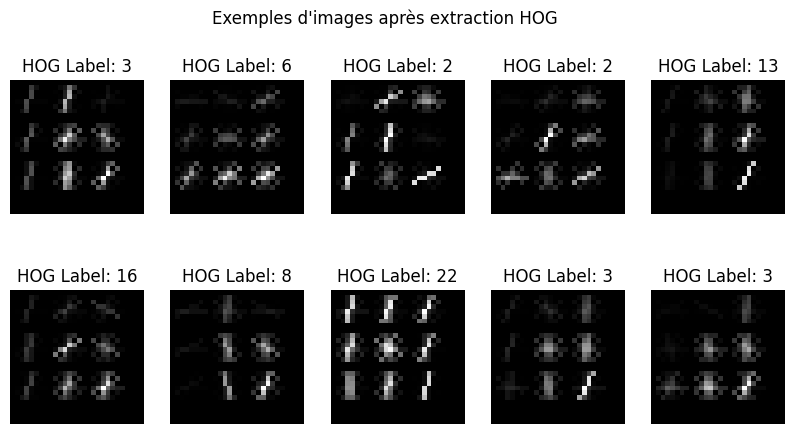

In [16]:
# Afficher quelques images après l'extraction HOG
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_hog_images[i], cmap='gray')
    plt.title(f"HOG Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Exemples d'images après extraction HOG")
plt.show()

Précision sur le jeu de validation : 0.9985433357611071
Précision sur le jeu de test : 0.9082543223647518

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       331
           1       0.98      0.95      0.97       432
           2       1.00      1.00      1.00       310
           3       0.86      0.92      0.89       245
           4       0.86      0.96      0.91       498
           5       0.99      1.00      0.99       247
           6       0.96      0.82      0.89       348
           7       0.91      0.97      0.94       436
           8       0.95      0.94      0.95       288
          10       0.91      0.91      0.91       331
          11       0.91      1.00      0.95       209
          12       0.87      0.77      0.82       394
          13       0.80      0.87      0.83       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347

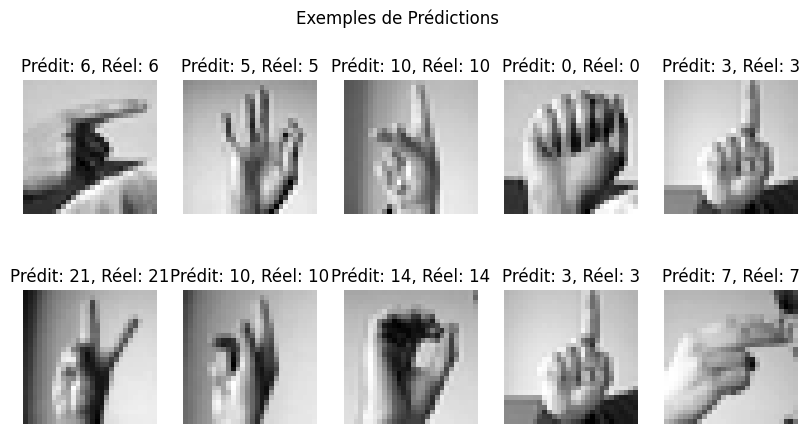

In [17]:
# Mise à l'échelle des données HOG
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

# Diviser les données d'entraînement en sous-ensemble pour validation
X_train_hog, X_val_hog, y_train, y_val = train_test_split(X_train_hog, y_train, test_size=0.1, random_state=42)

# Entraîner un SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_hog, y_train)

# Évaluer le modèle sur les données de validation
y_val_pred = svm_model.predict(X_val_hog)
print("Précision sur le jeu de validation :", accuracy_score(y_val, y_val_pred))

# Évaluer le modèle sur les données de test
y_test_pred = svm_model.predict(X_test_hog)
print("Précision sur le jeu de test :", accuracy_score(y_test, y_test_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_test_pred))

# Afficher quelques prédictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Prédit: {y_test_pred[i]}, Réel: {y_test[i]}")
    plt.axis('off')
plt.suptitle("Exemples de Prédictions")
plt.show()

In [21]:
# Informations sur y_test
print("Valeurs uniques dans y_test :")
print(np.unique(y_test))  # Affiche les classes uniques dans y_test

# Distribution des classes dans y_test
print("\nDistribution des classes dans y_test :")
unique_classes, class_counts = np.unique(y_test, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Classe {cls}: {count} exemples")

Valeurs uniques dans y_test :
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]

Distribution des classes dans y_test :
Classe 0: 331 exemples
Classe 1: 432 exemples
Classe 2: 310 exemples
Classe 3: 245 exemples
Classe 4: 498 exemples
Classe 5: 247 exemples
Classe 6: 348 exemples
Classe 7: 436 exemples
Classe 8: 288 exemples
Classe 10: 331 exemples
Classe 11: 209 exemples
Classe 12: 394 exemples
Classe 13: 291 exemples
Classe 14: 246 exemples
Classe 15: 347 exemples
Classe 16: 164 exemples
Classe 17: 144 exemples
Classe 18: 246 exemples
Classe 19: 248 exemples
Classe 20: 266 exemples
Classe 21: 346 exemples
Classe 22: 206 exemples
Classe 23: 267 exemples
Classe 24: 332 exemples


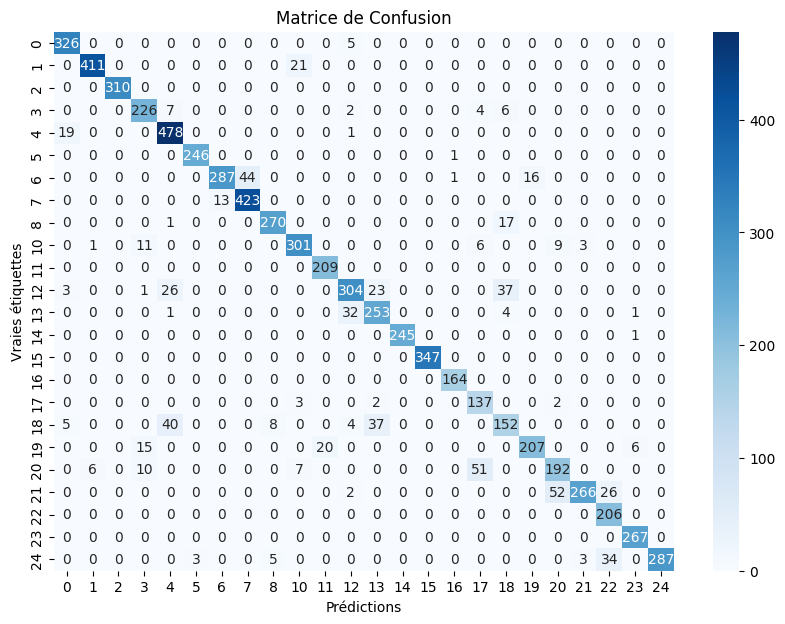

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

# Affichage de la matrice de confusion sous forme de carte thermique
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [18]:
from joblib import dump
# Sauvegarder le modèle après l'entraînement
dump(svm_model, 'model.joblib')

print("Modèle sauvegardé sous 'model.joblib'")

Modèle sauvegardé sous 'svm_hog_model.joblib'
